# Labuge 14: Gammaspektroskopi

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Kallibrering:

Vi importerer først data:

In [3]:
# Kallibreringskilde 1: CS-137
Kali_E_1 = 662 #keV
Kali_data_1 = np.genfromtxt("Cs-137.csv", delimiter = ",", skip_header = 1)

# Kallibreringskilde 2: C0-60
Kali_E_2_1 = 1173
Kali_E_2_2 = 1326
Kali_data_2 = np.genfromtxt("Co-60.csv", delimiter = ",", skip_header = 1)

# Kallibreringskilde 3: Ba-133
Kali_E_3_1 = 31
Kali_E_3_2 = 288
Kali_E_3_3 = 356
Kali_data_3 = np.genfromtxt("Ba-133.csv", delimiter = ",", skip_header = 1)

#Baggrund:
Baggrund_data = np.genfromtxt("baggrund.csv", delimiter = ",", skip_header = 1)



Vi laver nu et histogram for den første kallibreringskilde:

array([1.03243466e-02, 1.86067745e-02, 2.68892023e-02, ...,
       1.65586151e+01, 1.65668976e+01, 1.65751800e+01])

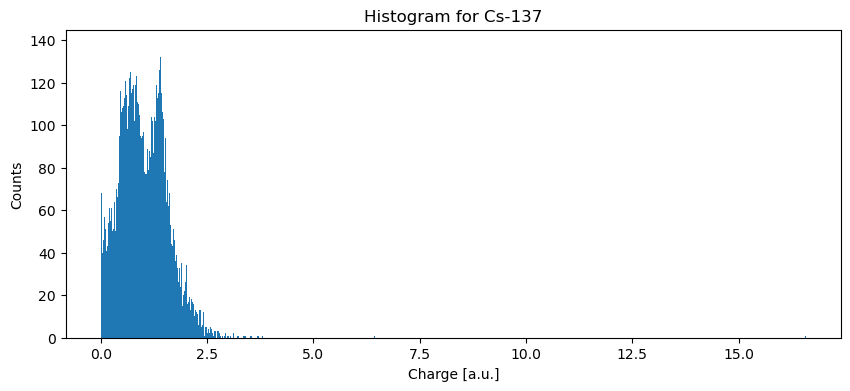

In [4]:
plt.figure(figsize = (10,4))

Kali_counts_1, Kali_bin_edges_1, patches = plt.hist(Kali_data_1, bins = 2000)
plt.xlabel("Charge [a.u.]")
plt.ylabel("Counts")
plt.title("Histogram for Cs-137")


Jeg definerer nu den finktion, jeg vil fitte mit peak efter. Jeg vil fitte efter en skalleret gauss-funktion med en lineær baggrund:

$$
f(x) = A \frac{1}{\sigma \sqrt{2 \pi}}e^{\frac{-(x-\mu)^2}{2 \sigma^2}} + ax+b
$$

In [5]:
def normal_fit(x, A, my, sigma, a, b):
    p = A*np.exp(-(x-my)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)) + a*x + b
    return p

Jeg definerer nu det interval, jeg vil fitte over, og laver fittet:

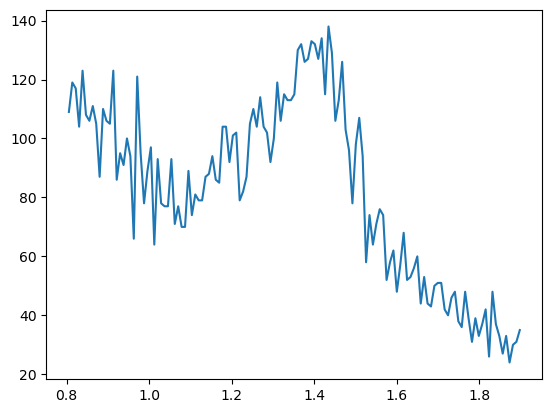

In [6]:

mask_1 = (Kali_bin_edges_1>=0.8)&(Kali_bin_edges_1<=1.9)

Kali_indices_1 = np.where(mask_1)


#Kontrollerer, disse grænser er gode ved plot:
plt.plot(Kali_bin_edges_1[Kali_indices_1], Kali_counts_1[Kali_indices_1])


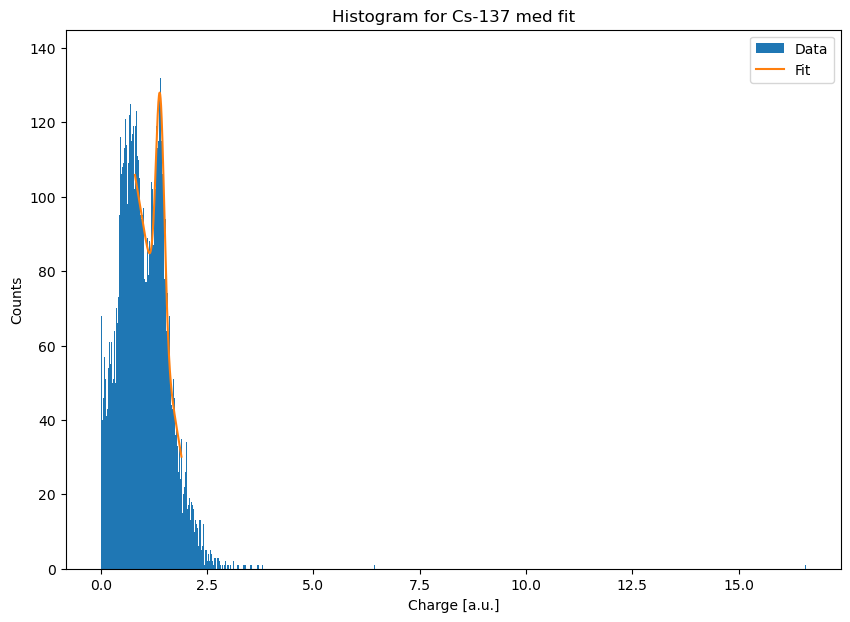

In [13]:
#Startgæt:
my1_gæt = 1.4
sigma1_gæt = 0.2
a1_gæt = -100
b1_gæt = 200

#Laver fit:

Kali_par_1, Kali_cov_1 = curve_fit(normal_fit, Kali_bin_edges_1[Kali_indices_1], Kali_counts_1[Kali_indices_1], p0 = [20.0, my1_gæt, sigma1_gæt, a1_gæt, b1_gæt], maxfev = 1600)

#Fordeler fundne værdier:
Kali_A_1, Kali_my_1, Kali_sigma_1, Kali_a_1, Kali_b_1 = Kali_par_1

# Finder usikkerheder
d_Kali_A_1, d_Kali_my_1, d_Kali_sigma_1, d_Kali_a_1, d_Kali_b_1 = np.sqrt(np.diag(Kali_cov_1))


#Plotter den fittede funktion med data:
plt.figure(figsize = (10,7))
plt.hist(Kali_data_1, bins = 2000, label = "Data")

X = np.linspace(Kali_bin_edges_1[np.min(Kali_indices_1)], Kali_bin_edges_1[np.max(Kali_indices_1)], 1000)
Y = normal_fit(X, Kali_A_1, Kali_my_1, Kali_sigma_1, Kali_a_1, Kali_b_1)

plt.plot(X, Y, label = "Fit")

plt.xlabel("Charge [a.u.]")
plt.ylabel("Counts")
plt.title("Histogram for Cs-137 med fit")
plt.legend()


Gentager nu for kallibreringskilder 2 og 3:

Først for kilde 2

Text(0.5, 1.0, 'Histogram for Co-60')

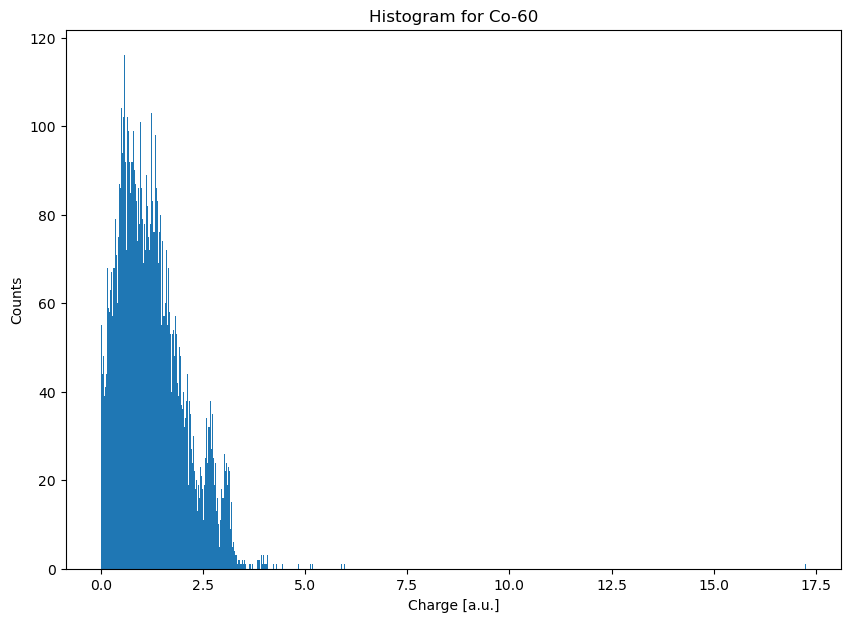

In [8]:
plt.figure(figsize = (10,7))

Kali_counts_2, Kali_bin_edges_2, patches = plt.hist(Kali_data_2, bins = 2000)
plt.xlabel("Charge [a.u.]")
plt.ylabel("Counts")
plt.title("Histogram for Co-60")

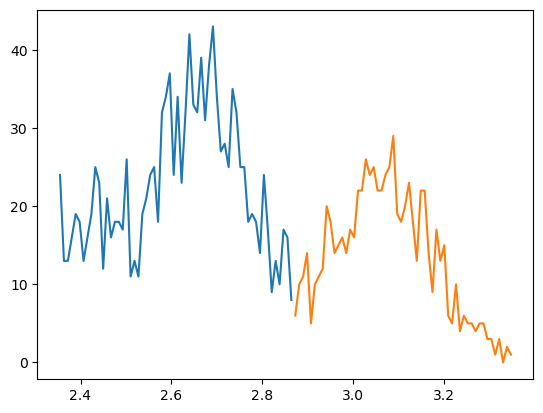

In [9]:
mask_2_1 = (Kali_bin_edges_2>=2.35)&(Kali_bin_edges_2<=2.87)

Kali_indices_2_1 = np.where(mask_2_1)

mask_2_2 = (Kali_bin_edges_2>=2.87)&(Kali_bin_edges_2<=3.35)

Kali_indices_2_2 = np.where(mask_2_2)

#Kontrollerer, disse grænser er gode ved plot:
plt.plot(Kali_bin_edges_2[Kali_indices_2_1], Kali_counts_2[Kali_indices_2_1])

plt.plot(Kali_bin_edges_2[Kali_indices_2_2], Kali_counts_2[Kali_indices_2_2])




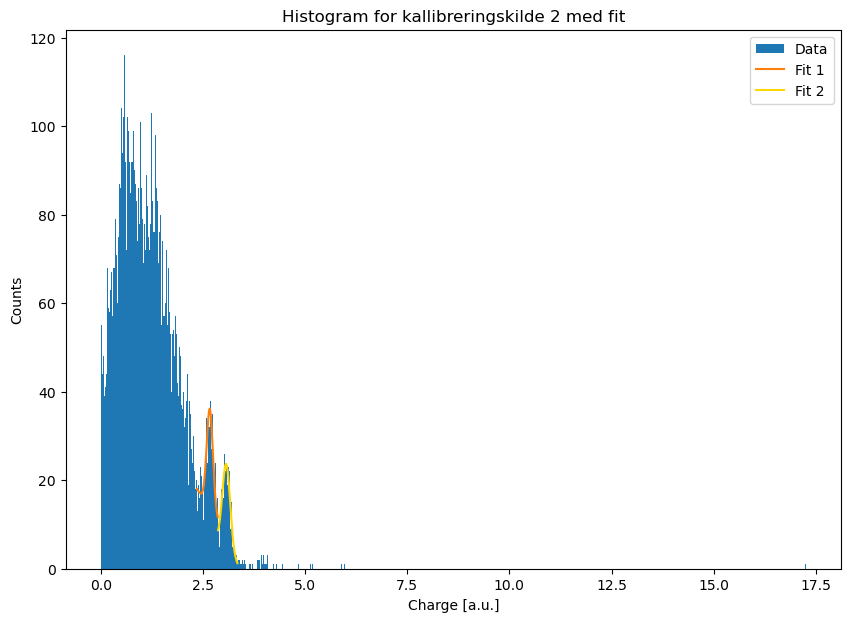

In [10]:
#Startgæt:
my2_gæt = 2.5
sigma2_gæt = 0.1
a2_gæt = -50
b2_gæt = 180

#Laver fit:

Kali_par_2_1, Kali_cov_2_1 = curve_fit(normal_fit, Kali_bin_edges_2[Kali_indices_2_1], Kali_counts_2[Kali_indices_2_1], p0 = [100.0, my2_gæt, sigma2_gæt, a2_gæt, b2_gæt], maxfev = 1600)

Kali_par_2_2, Kali_cov_2_2 = curve_fit(normal_fit, Kali_bin_edges_2[Kali_indices_2_2], Kali_counts_2[Kali_indices_2_2], p0 = [100.0, 3, sigma2_gæt, a2_gæt, b2_gæt], maxfev = 1600)


#Fordeler fundne værdier:
Kali_A_2_1, Kali_my_2_1, Kali_sigma_2_1, Kali_a_2_1, Kali_b_2_1 = Kali_par_2_1

d_Kali_A_2_1, d_Kali_my_2_1, d_Kali_sigma_2_1, d_Kali_a_2_1, d_Kali_b_2_1 = np.sqrt(np.diag(Kali_cov_2_1))


Kali_A_2_2, Kali_my_2_2, Kali_sigma_2_2, Kali_a_2_2, Kali_b_2_2 = Kali_par_2_2

d_Kali_A_2_2, d_Kali_my_2_2, d_Kali_sigma_2_2, d_Kali_a_2_2, d_Kali_b_2_2 = np.sqrt(np.diag(Kali_cov_2_2))


#Plotter den fittede funktion med data:
plt.figure(figsize = (10,7))
plt.hist(Kali_data_2, bins = 2000, label = "Data")

X1 = np.linspace(Kali_bin_edges_2[np.min(Kali_indices_2_1)], Kali_bin_edges_2[np.max(Kali_indices_2_1)], 1000)
Y1 = normal_fit(X1, Kali_A_2_1, Kali_my_2_1, Kali_sigma_2_1, Kali_a_2_1, Kali_b_2_1)

plt.plot(X1, Y1, label = "Fit 1")

X2 = np.linspace(Kali_bin_edges_2[np.min(Kali_indices_2_2)], Kali_bin_edges_2[np.max(Kali_indices_2_2)], 1000)
Y2 = normal_fit(X2, Kali_A_2_2, Kali_my_2_2, Kali_sigma_2_2, Kali_a_2_2, Kali_b_2_2)

plt.plot(X2, Y2, label = "Fit 2", color = "gold")


plt.xlabel("Charge [a.u.]")
plt.ylabel("Counts")
plt.title("Histogram for kallibreringskilde 2 med fit")
plt.legend()


Nu kilde 3:

Text(0.5, 1.0, 'Histogram for kallibreringskilde 3')

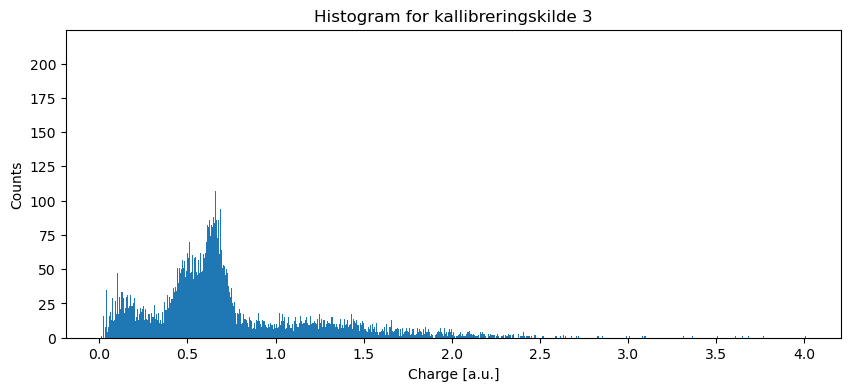

In [11]:
plt.figure(figsize = (10,4))

Kali_counts_3, Kali_bin_edges_3, patches = plt.hist(Kali_data_3, bins = 2000)
plt.xlabel("Charge [a.u.]")
plt.ylabel("Counts")
plt.title("Histogram for kallibreringskilde 3")

In [12]:
Kali_Nmin_3 =
Kali_Nmax_3 =

#Kontrollerer, disse grænser er gode ved plot:
plt.plot(Kali_bin_edges_3[Kali_Nmin_3:Kali_Nmax_3], Kali_counts_3[Kali_Nmin_3:Kali_Nmax_3])


SyntaxError: invalid syntax (1880382472.py, line 1)

In [ ]:
#Startgæt:
my3_gæt = 1.7
sigma3_gæt = 0.1
a3_gæt = -50
b3_gæt = 180

#Laver fit:

Kali_par_3, Kali_cov_3 = curve_fit(normal_fit, Kali_bin_edges_3[Kali_Nmin_3:Kali_Nmax_3], Kali_counts_3[Kali_Nmin_3:Kali_Nmax_3], p0 = [100.0, my3_gæt, sigma3_gæt, a3_gæt, b3_gæt], maxfev = 1600)

#Fordeler fundne værdier:
Kali_A_3, Kali_my_3, Kali_sigma_3, Kali_a_3, Kali_b_3 = Kali_par_3

d_Kali_A_3, d_Kali_my_3, d_Kali_sigma_3, d_Kali_a_3, d_Kali_b_3 = np.sqrt(np.diag(Kali_cov_3))


#Plotter den fittede funktion med data:
plt.figure(figsize = (10,7))
plt.hist(Kali_data_3, bins = 100, label = "Data")

X = np.linspace(Kali_bin_edges_3[Kali_Nmin_2], Kali_bin_edges_3[Kali_Nmax_3], 1000)
Y = normal_fit(X, Kali_A_3, Kali_my_3, Kali_sigma_3, Kali_a_3, Kali_b_3)

plt.plot(X, Y, label = "Fit")

plt.xlabel("Charge [a.u.]")
plt.ylabel("Counts")
plt.title("Histogram for kallibreringskilde 3 med fit")
plt.legend()

Baggrund:

Text(0.5, 1.0, 'Histogram for baggrundsstråling')

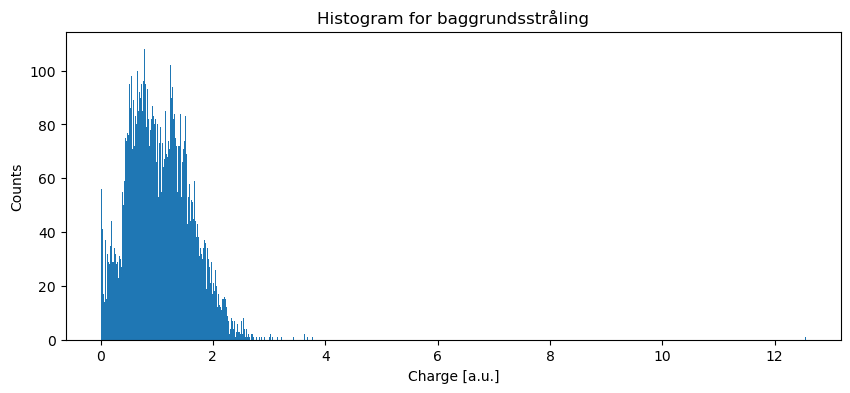

In [ ]:
plt.figure(figsize = (10,4))

Kali_counts_b, Kali_bin_edges_b, patches = plt.hist(Baggrund_data, bins = 2000)
plt.xlabel("Charge [a.u.]")
plt.ylabel("Counts")
plt.title("Histogram for baggrundsstråling")

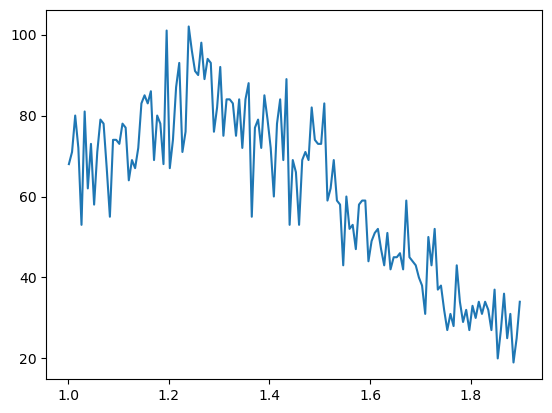

In [ ]:
mask_b = (Kali_bin_edges_b>=1)&(Kali_bin_edges_b<=1.9)

Kali_indices_b = np.where(mask_b)


#Kontrollerer, disse grænser er gode ved plot:
plt.plot(Kali_bin_edges_b[Kali_indices_b], Kali_counts_b[Kali_indices_b])


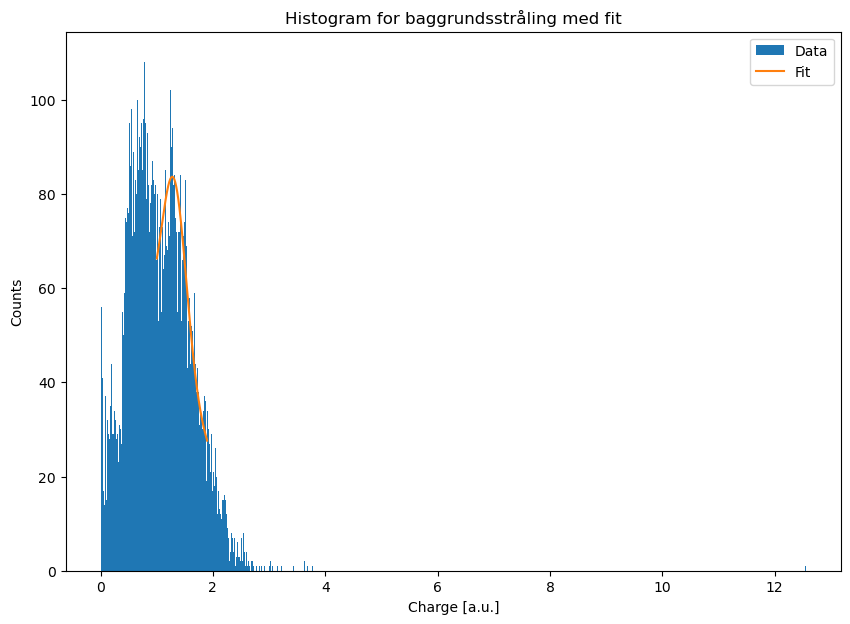

In [ ]:
#Startgæt:
myb_gæt = 1.4
sigmab_gæt = 0.2
ab_gæt = -70
bb_gæt = 150

#Laver fit:

Kali_par_b, Kali_cov_b = curve_fit(normal_fit, Kali_bin_edges_b[Kali_indices_b], Kali_counts_b[Kali_indices_b], p0 = [20.0, myb_gæt, sigmab_gæt, ab_gæt, bb_gæt], maxfev = 1600)

#Fordeler fundne værdier:
Kali_A_b, Kali_my_b, Kali_sigma_b, Kali_a_b, Kali_b_b = Kali_par_b

d_Kali_A_b, d_Kali_my_b, d_Kali_sigma_b, d_Kali_a_b, d_Kali_b_b = np.sqrt(np.diag(Kali_cov_b))


#Plotter den fittede funktion med data:
plt.figure(figsize = (10,7))
plt.hist(Baggrund_data, bins = 2000, label = "Data")

X = np.linspace(Kali_bin_edges_b[np.min(Kali_indices_b)], Kali_bin_edges_b[np.max(Kali_indices_b)], 1000)
Y = normal_fit(X, Kali_A_b, Kali_my_b, Kali_sigma_b, Kali_a_b, Kali_b_b)

plt.plot(X, Y, label = "Fit")

plt.xlabel("Charge [a.u.]")
plt.ylabel("Counts")
plt.title("Histogram for baggrundsstråling med fit")
plt.legend()

Laver nu kallibreringsgraf:

Text(0.5, 1.0, 'Ladning som funktion af energi')

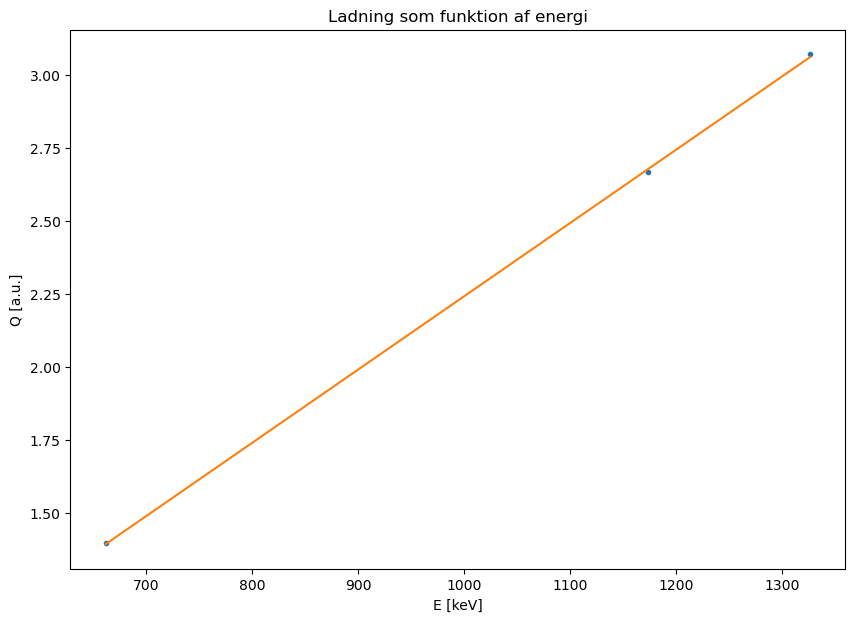

In [ ]:
E = np.array([Kali_E_1, Kali_E_2_1, Kali_E_2_2])

Q = np.array([Kali_my_1, Kali_my_2_1, Kali_my_2_2])
dQ = np.array([Kali_sigma_1, Kali_sigma_2_1, Kali_sigma_2_2])

def lin(x, a, b):
    y = a*x+b
    return y

par_p1, cov_p1 = curve_fit(lin, E, Q, sigma = dQ, absolute_sigma = True)

a, b = par_p1

da, db = np.sqrt(np.diag(cov_p1))

plt.figure(figsize = (10,7))
plt.plot(E, Q, ".")

X = np.linspace(np.min(E), np.max(E), 1000)
Y = lin(X, a, b)

plt.plot(X, Y)

plt.xlabel("E [keV]")
plt.ylabel("Q [a.u.]")
plt.title("Ladning som funktion af energi")

Definerer funktion, som omregner fra ladning til energi:

In [ ]:
def omregning(Q, a, b):
    E = (Q-b)/a
    return E